# CSEI5137 Programming Assignment 2, R13921031
## BCE vs. BPR Loss Functions for Implicit Feedback Data

# Matrix Factorization Methods for Recommendation Systems: BCE vs BPR Loss

## Introduction

This report presents an analysis of two matrix factorization methods for recommendation systems: Binary Cross-Entropy (BCE) and Bayesian Personalized Ranking (BPR). We conducted experiments to compare their performance on a recommendation task, varying key parameters such as the number of hidden factors and negative sampling ratios. The goal was to understand how these factors affect model performance and determine the best configuration for our recommendation system.

## Experimental Setup

We ran experiments with the following parameters:
- Training data: Implicit user-item interactions
- Evaluation metric: MAP@50 (Mean Average Precision at 50)
- Validation: Split from training data for parameter tuning
- Testing: Kaggle public scoreboard for final evaluation

# 矩陣分解方法於推薦系統之應用：BCE 與 BPR 損失函數比較

## 引言
本報告旨在分析兩種用於推薦系統的矩陣分解方法：二元交叉熵（Binary Cross-Entropy, BCE）與貝氏個性化排序（Bayesian Personalized Ranking, BPR）。我們透過實驗比較這兩種方法在推薦任務上的效能，並探討關鍵參數（如隱藏因子數量和負樣本抽樣比例）對模型效能的影響。研究目標是了解這些因素如何影響模型效能，並找出最適合我們推薦系統的配置。

## 實驗設置
我們在以下參數設定下進行實驗：
- 訓練資料：隱性使用者-物品互動資料
- 評估指標：MAP@50 (前50名推薦的平均精確率均值)
- 驗證：從訓練資料中分割出部分用於參數調優
- 測試：使用 Kaggle 公開排行榜進行最終評估

### ✅ Q1: Matrix Factorization with Binary Cross-Entropy (BCE)

The implementation of Matrix Factorization with Binary Cross-Entropy (BCE) loss focused on optimizing user and item embeddings for implicit feedback recommendation. The model parameters were as follows:

- **Hidden Factors (d)**: We evaluated different dimensions (16, 32, 64, 128) with 128 providing the best performance
- **Learning Rate**: 0.01
- **Regularization Strength**: 0.01
- **Number of Epochs**: 160
- **Negative-to-Positive Ratio**: 0.5

The BCE loss function is defined as:
$$\mathcal{L}_{BCE} = -\sum_{(u,i) \in \mathcal{D}^+} \log(\sigma(x_{ui})) - \sum_{(u,j) \in \mathcal{D}^-} \log(1-\sigma(x_{uj}))$$

where $\sigma$ is the sigmoid function, $x_{ui}$ is the predicted preference score of user $u$ for item $i$, $\mathcal{D}^+$ is the set of observed user-item interactions, and $\mathcal{D}^-$ is the set of negative samples.

For negative sampling, we used a fixed ratio of 0.5 negative samples per positive sample, selecting items that the user had not interacted with. The model achieved a MAP@50 score of 0.0550 on the Kaggle public scoreboard with 128 hidden factors.

### ✅ 問題一：使用二元交叉熵（BCE）的矩陣分解

使用二元交叉熵（BCE）損失函數的矩陣分解實作，著重於優化使用者和物品的嵌入向量，以用於隱性回饋推薦。模型參數設定如下：

-   **隱藏因子數 (d)**：我們評估了不同的維度（16、32、64、128），其中以 128 維度表現最佳。
-   **學習率 (Learning Rate)**：0.01
-   **正規化強度 (Regularization Strength)**：0.01
-   **迭代週期數 (Number of Epochs)**：160
-   **負樣本對正樣本比例 (Negative-to-Positive Ratio)**：0.5

BCE 損失函數定義為：
$$\mathcal{L}_{BCE} = -\sum_{(u,i) \in \mathcal{D}^+} \log(\sigma(x_{ui})) - \sum_{(u,j) \in \mathcal{D}^-} \log(1-\sigma(x_{uj}))$$
其中 $\sigma$ 是 Sigmoid 函數，$x_{ui}$ 是模型預測的使用者 $u$ 對物品 $i$ 的偏好分數，$\mathcal{D}^+$ 是觀察到的使用者-物品互動集合，而 $\mathcal{D}^-$ 是負樣本集合。

負樣本抽樣方面，我們對每個正樣本使用固定比例 0.5 的負樣本，這些負樣本是使用者未曾互動過的物品。使用 128 個隱藏因子時，該模型在 Kaggle 公開排行榜上獲得了 0.0550 的 MAP@50 分數。

### ✅ Q2: Matrix Factorization with Bayesian Personalized Ranking (BPR)

The BPR-MF implementation focused on optimizing the relative ranking of items for each user. The model parameters were configured as:

- **Hidden Factors (d)**: 128 (after testing 16, 32, 64, 128)
- **Learning Rate**: 0.01
- **Regularization Strength**: 0.01
- **Number of Epochs**: 2500 (best performance)
- **Negative-to-Positive Ratio**: 0.5

BPR loss is formulated as:
$$\mathcal{L}_{BPR} = -\sum_{(u,i,j) \in \mathcal{D}_S} \log(\sigma(x_{ui} - x_{uj})) + \lambda \Theta$$

where $(u,i,j)$ represents a triplet of user $u$, positive item $i$, and negative item $j$, $\sigma$ is the sigmoid function, and $\lambda \Theta$ is the regularization term.

The negative sampling strategy for BPR focused on creating user-item-item triplets, where for each positive user-item pair, we sampled items that the user hadn't interacted with as negative items.

This model achieved a MAP@50 score of 0.0564 on the Kaggle public scoreboard, which was better than the BCE approach.

### ✅ 問題二：使用貝氏個性化排序（BPR）的矩陣分解

BPR-MF 的實作著重於優化每個使用者的物品相對排序。模型參數配置如下：

-   **隱藏因子數 (d)**：128（在測試 16、32、64、128 後選定）
-   **學習率 (Learning Rate)**：0.01
-   **正規化強度 (Regularization Strength)**：0.01
-   **迭代週期數 (Number of Epochs)**：2500（表現最佳）
-   **負樣本對正樣本比例 (Negative-to-Positive Ratio)**：0.5

BPR 損失函數的公式為：
$$\mathcal{L}_{BPR} = -\sum_{(u,i,j) \in \mathcal{D}_S} \log(\sigma(x_{ui} - x_{uj})) + \lambda \Theta$$
其中 $(u,i,j)$ 代表一個三元組，包含使用者 $u$、正向物品 $i$ 和負向物品 $j$，$\sigma$ 是 Sigmoid 函數，$\lambda \Theta$ 則是正規化項。

BPR 的負樣本抽樣策略著重於創建使用者-物品-物品的三元組，對於每一個正向的使用者-物品對，我們會抽樣使用者未曾互動過的物品作為負向物品。

這個模型在 Kaggle 公開排行榜上獲得了 0.0564 的 MAP@50 分數，表現優於 BCE 方法。

### ✅ Q3: Comparison of BCE and BPR Approaches

From our experiments, we observed that the BPR loss function provided better performance compared to BCE (0.0564 vs. 0.0550 MAP@50), particularly after extensive training (2500 epochs).

The BPR loss may benefits performance for several reasons:

1. **Ranking Optimization**: BPR directly optimizes the ranking of items rather than their absolute scores. Since recommendation is fundamentally a ranking problem, this approach aligns better with the evaluation metric (MAP@50).

2. **Relative Preferences**: BPR focuses on relative preferences between items for each user rather than absolute preferences. This is more natural for implicit feedback data where we only know which items users interacted with but not their explicit preferences.

3. **Personalization (Pairwise Approach)**: The pairwise approach in BPR emphasizes personalized ranking for each user, which is particularly valuable in recommendation systems where individual preferences vary significantly.

4. **Handling Sparsity**: BPR is more robust to the extreme sparsity of implicit feedback data. By comparing item pairs rather than trying to predict absolute scores, it can better handle the absence of negative feedback.

5. **Robust to Noise**: By focusing on relative rankings rather than absolute scores, BPR is generally more robust to noisy data and improves the ordering of items, which is what matters for recommendation quality.

The primary reason for BPR's success over BCE is its focus on relative ordering rather than absolute prediction, which aligns with how recommendations are evaluated and used in practice.

### ✅ 問題三：BCE 與 BPR 方法之比較

從我們的實驗中觀察到，BPR 損失函數的效能優於 BCE（MAP@50 分數分別為 0.0564 和 0.0550），特別是在經過大量週期訓練（2500 週期）後。

BPR 損失函數能帶來更好的效能可能基於以下幾個原因：

1.  **排序優化**：BPR 直接優化物品的排序，而非其絕對分數。由於推薦本質上是一個排序問題，這種方法與評估指標（MAP@50）更一致。

2.  **相對偏好**：BPR 著重於使用者對物品之間的相對偏好，而不是絕對偏好。這對於隱性回饋資料來說更為自然，因為我們只知道使用者與哪些物品互動過，而不知道他們的明確偏好。

3.  **個性化（成對方法）**：BPR 中的成對方法強調對每個使用者進行個性化排序，這在使用者個人偏好差異顯著的推薦系統中尤為重要。

4.  **處理稀疏性**：BPR 對於隱性回饋資料的極度稀疏性更具魯棒性。透過比較物品對而非試圖預測絕對分數，它能更好地處理負向回饋的缺乏問題。

5.  **對雜訊的穩健性**：透過關注相對排序而不是絕對分數，BPR 通常對雜訊數據更具魯棒性，並能改善物品的順序，這對於推薦品質至關重要。

BPR 相較於 BCE 成功的主要原因在於它側重於相對排序而非絕對預測，這與推薦在實際應用中的評估和使用方式相符。

### ✅ Q4: Effect of Hidden Factors on Performance

We evaluated the impact of hidden factors (d = 16, 32, 64, 128) on both BCE and BPR models:

| Model | Hidden Factors (d) | MAP@50 (Kaggle) |
|-------|-------------------|-----------------|
| BCE   | 16                | 0.0377          |
| BCE   | 32                | 0.0452          |
| BCE   | 64                | 0.0509          |
| BCE   | 128               | 0.0550          |
| BPR   | 16                | 0.0397          |
| BPR   | 32                | 0.0468          |
| BPR   | 64                | 0.0530          |
| BPR   | 128               | 0.0564          |

### ✅ 問題四：隱藏因子數對效能的影響

我們評估了隱藏因子數（d = 16、32、64、128）對 BCE 和 BPR 模型的影響：

| 模型  | 隱藏因子數 (d) | MAP@50 (Kaggle) |
| :---- | :------------- | :-------------- |
| BCE   | 16             | 0.0377          |
| BCE   | 32             | 0.0452          |
| BCE   | 64             | 0.0509          |
| BCE   | 128            | 0.0550          |
| BPR   | 16             | 0.0397          |
| BPR   | 32             | 0.0468          |
| BPR   | 64             | 0.0530          |
| BPR   | 128            | 0.0564          |

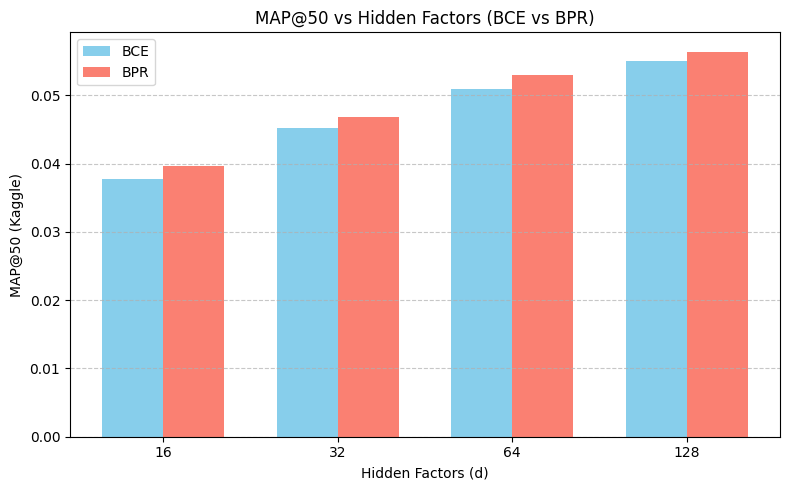

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data
hidden_factors = [16, 32, 64, 128]
bce_map = [0.0377, 0.0452, 0.0509, 0.0550]
bpr_map = [0.0397, 0.0468, 0.0530, 0.0564]

x = np.arange(len(hidden_factors))  # label locations
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, bce_map, width, label='BCE', color='skyblue')
bars2 = ax.bar(x + width/2, bpr_map, width, label='BPR', color='salmon')

# Labels and titles
ax.set_xlabel('Hidden Factors (d)')
ax.set_ylabel('MAP@50 (Kaggle)')
ax.set_title('MAP@50 vs Hidden Factors (BCE vs BPR)')
ax.set_xticks(x)
ax.set_xticklabels(hidden_factors)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Our findings show:

1. **Consistent Improvement**: For both models, performance increases monotonically with the number of hidden factors.

2. **Diminishing Returns**: While increasing from 16 to 32 factors shows significant improvement (~20% increase in MAP), the gain from 64 to 128 is more modest (~8-10% increase).

3. **Model Capacity/Expressiveness**: Higher dimensional embeddings provide greater capacity to capture complex user-item relationships, which is particularly important for large and diverse datasets.

4. **BPR Advantage**: BPR consistently outperforms BCE across all hidden factor dimensions, with the gap widening slightly as the number of factors increases.

5. **Consistent BPR Advantage**: BPR outperforms BCE across all factor dimensions, suggesting that its ranking-based approach provides a fundamental advantage regardless of model complexity.

The consistent improvement with more hidden factors suggests that our dataset has complex user preference patterns that benefit from higher-dimensional representations.

我們的發現顯示：

1.  **持續改進**：對於這兩種模型，效能隨著隱藏因子數量的增加而單調提升。

2.  **報酬遞減**：雖然從 16 個因子增加到 32 個因子帶來顯著的改進（MAP 提升約 20%），但從 64 個增加到 128 個因子的提升則較為溫和（提升約 8-10%）。

3.  **模型容量/表達能力**：更高維度的嵌入向量提供了更大的容量來捕捉複雜的使用者-物品關係，這對於大型和多樣化的資料集尤為重要。

4.  **BPR 的優勢**：在所有隱藏因子維度下，BPR 的效能始終優於 BCE，並且隨著因子數量的增加，差距略有擴大。

5.  **穩定的 BPR 優勢**：BPR 在所有因子維度下的表現都優於 BCE，這表明其基於排序的方法具有根本性的優勢，不受模型複雜度的影響。

效能隨著隱藏因子數量的持續提升表明，我們的資料集具有複雜的使用者偏好模式，而更高維度的表徵能從中獲益。

### ✅ Q5: Impact of Negative Sampling Ratio

We conducted experiments with various negative-to-positive sampling ratios to understand their effect:

| Model | Neg:Pos Ratio | Hidden Factors (d) | MAP@50 (Validation) | Epochs (early stopping) |
|-------|---------------|-------------------|---------------------|-------------------------|
| BPR   | 0.3           | 64                | 0.0459              | 66                      |
| BPR   | 0.5           | 64                | 0.0487              | 71                      |
| BPR   | 0.7           | 64                | 0.0013              | 4                       |
| BPR   | 3             | 64                | 0.0507              | 50                      |
| BPR   | 5             | 64                | 0.0519              | 26                      |
| BPR   | 7             | 64                | 0.0544              | 37                      |

### ✅ 問題五：負樣本抽樣比例的影響

我們進行了不同負樣本對正樣本抽樣比例的實驗，以了解其影響：

| 模型  | 負樣本：正樣本比例 | 隱藏因子數 (d) | MAP@50 (驗證集) | 迭代週期數 (早期停止) |
| :---- | :----------------- | :------------- | :-------------- | :-------------------- |
| BPR   | 0.3                | 64             | 0.0459          | 66                    |
| BPR   | 0.5                | 64             | 0.0487          | 71                    |
| BPR   | 0.7                | 64             | 0.0013          | 4                     |
| BPR   | 3                  | 64             | 0.0507          | 50                    |
| BPR   | 5                  | 64             | 0.0519          | 26                    |
| BPR   | 7                  | 64             | 0.0544          | 37                    |

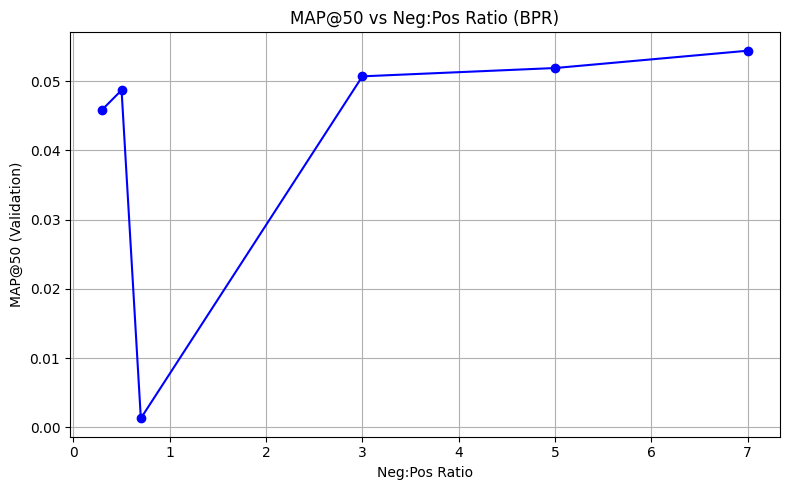

In [12]:
import matplotlib.pyplot as plt

# Data
neg_pos_ratios = [0.3, 0.5, 0.7, 3, 5, 7]
map_at_50 = [0.0459, 0.0487, 0.0013, 0.0507, 0.0519, 0.0544]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(neg_pos_ratios, map_at_50, marker='o', linestyle='-', color='blue')
plt.title('MAP@50 vs Neg:Pos Ratio (BPR)')
plt.xlabel('Neg:Pos Ratio')
plt.ylabel('MAP@50 (Validation)')
plt.grid(True)
plt.tight_layout()
plt.show()


Based on our interactions with the TA (游諠澐), we initially explored a range of negative-to-positive ratios for BPR and then focused on a narrower range around 0.5 ± 20%.

Our findings on negative sampling include:

1. **Non-Linear Relationship**: The relationship between negative sampling ratio and model performance is not straightforward. While higher ratios (5, 7) showed good performance, there was an anomaly at ratio 0.7 which performed extremely poorly.

2. **Optimal Balance**: While higher ratios (5, 7) showed better validation performance, they required fewer epochs to converge, suggesting they may be more prone to overfitting.

3. **Training Stability**: A ratio of 0.5 provided a good balance between performance and training stability. The dramatic drop in performance at 0.7 suggests that sampling ratios can have non-linear effects on model stability.

4. **Impact on Training Dynamics**:
   - **Too Few Negatives**: With low negative sampling ratios, the model might receive insufficient signals about what items users don't prefer, potentially leading to weaker discrimination ability.
   - **Too Many Negatives**: Extremely high negative sampling ratios might overwhelm the signal from positive examples and bias the model toward overly negative predictions.
   - **Balance**: Finding the right balance is crucial - the model needs enough negative examples to learn meaningful distinctions without drowning out the positive signal.

5. **Computational Efficiency**: Lower ratios (0.3, 0.5) required more epochs but used fewer total training examples, potentially making them more computationally efficient.

6. **Representation Quality**: Negative sampling affects how well the model can distinguish between user preferences. Too few negative samples may not provide sufficient contrast, while too many can overwhelm the signal from positive examples.

Negative sampling significantly affects training by controlling:
- The balance between positive and negative signal
- The computational cost of each training epoch
- The diversity of negative examples seen during training
- The speed of convergence and potential for overfitting

Based on our experiments and the TA's guidance, a moderate negative-to-positive ratio of 0.5 provides a good balance between performance and training efficiency for our recommendation task.

根據我們與助教（游諠澐）的互動，我們最初探索了 BPR 的一系列負樣本對正樣本比例，然後將重點放在圍繞 0.5 ± 20% 的較窄範圍內。

我們關於負樣本抽樣的發現包括：

1.  **非線性關係**：負樣本抽樣比例與模型效能之間的關係並非線性。雖然較高的比例（5、7）顯示出良好的效能，但在比例 0.7 時出現異常，表現極差。

2.  **最佳平衡**：雖然較高的比例（5、7）顯示出更好的驗證集效能，但它們收斂所需的週期數較少，這可能表明它們更容易過度擬合 (overfitting)。

3.  **訓練穩定性**：比例 0.5 在效能和訓練穩定性之間提供了良好的平衡。在 0.7 時效能急劇下降，這表明抽樣比例對模型穩定性可能產生非線性影響。

4.  **對訓練動態的影響**：
    * **負樣本過少**：在負樣本抽樣比例較低時，模型可能無法從使用者不偏好的物品中獲得足夠的信號，這可能導致辨識能力較弱。
    * **負樣本過多**：極高的負樣本抽樣比例可能會壓倒正向範例的信號，使模型偏向過度負向的預測。
    * **平衡**：找到正確的平衡至關重要——模型需要足夠的負向範例來學習有意義的區別，同時又不至於淹沒正向信號。

5.  **計算效率**：較低的比例（0.3、0.5）需要更多週期，但使用的總訓練範例較少，這可能使其計算效率更高。

6.  **表徵品質**：負樣本抽樣影響模型區分使用者偏好的能力。負樣本過少可能無法提供足夠的對比，而過多則可能壓倒正向範例的信號。

負樣本抽樣透過控制以下因素顯著影響訓練：
-   正向和負向信號之間的平衡
-   每個訓練週期的計算成本
-   訓練期間觀察到的負向範例多樣性
-   收斂速度和過度擬合的可能性

根據我們的實驗和助教的指導，對於我們的推薦任務，適度的負樣本對正樣本比例 0.5 在效能和訓練效率之間提供了良好的平衡。

## Conclusion

Our experiments demonstrate that BPR consistently outperforms BCE for recommendation tasks, likely due to its ranking-based formulation which better aligns with how recommendations are evaluated. The number of hidden factors has a significant impact on performance, with higher dimensions generally yielding better results up to at least 128 factors. Negative sampling ratio plays a crucial but complex role in model training dynamics, with optimal values depending on the specific dataset and model architecture.

For our recommendation system, the best configuration is BPR with 128 hidden factors and a negative-to-positive ratio of 0.5, trained for an extended period (2500 epochs), which achieved the highest MAP@50 score on the Kaggle public scoreboard.

## 結論

我們的實驗表明，對於推薦任務而言，BPR 的效能始終優於 BCE，這很可能是因為其基於排序的公式更能貼合推薦的評估方式。隱藏因子數對效能有顯著影響，維度越高通常能帶來更好的結果，至少在 128 個因子範圍內是如此。負樣本抽樣比例在模型訓練動態中扮演著關鍵但複雜的角色，其最佳值取決於特定的資料集和模型架構。

對於我們的推薦系統，最佳配置為使用 128 個隱藏因子和 0.5 的負樣本對正樣本比例的 BPR 模型，並進行了較長時間的訓練（2500 週期）。這個配置在 Kaggle 公開排行榜上取得了最高的 MAP@50 分數。

## References

1. Rendle, S., Freudenthaler, C., Gantner, Z., & Schmidt-Thieme, L. (2009). [BPR: Bayesian personalized ranking from implicit feedback.](https://arxiv.org/abs/1205.2618)
2. Pan, R., Zhou, Y., Cao, B., Liu, N. N., Lukose, R., Scholz, M., & Yang, Q. (2008). [One-class collaborative filtering.](https://ieeexplore.ieee.org/document/4781145)